# Crime Data Analysis : Jersey City: Part - 2 

### Supervised learning for prediction of crime in jersey city is the objective of the project. 
### The data used for the analysis are real time data (for academic purpose)

# Import necessary libraries

In [70]:
import numpy as np
import pandas as pd
import scipy as spy
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

# Reading processed data from CSV file 

In [71]:
crime_data=pd.read_csv("C:\\Users\\rajag\\Documents\\Python Scripts\\machine-learning\\JC_num.CSV")
crime_data.head()

,Unnamed: 0,Occurrence Date,Day of Week,Occurrence Month,Occurrence Day,Occurrence_Year,Occurrence Hour,Offense,Sector,Borough
0,257,2,2.0,1.0,9.0,2006.0,0.0,3.0,17,3
1,258,2,2.0,1.0,9.0,2006.0,0.0,3.0,14,2
2,259,2,2.0,1.0,9.0,2006.0,0.0,3.0,12,2
3,260,2,2.0,1.0,9.0,2006.0,0.0,1.0,10,4
4,261,2,2.0,1.0,9.0,2006.0,0.0,1.0,12,4


# Question: Given Day of week, Sector and borough what kind crime can a person be subject to?

# Year 2006:

In [72]:
crime_data=crime_data[crime_data.Occurrence_Year == 2006]
crime_data.head()

,Unnamed: 0,Occurrence Date,Day of Week,Occurrence Month,Occurrence Day,Occurrence_Year,Occurrence Hour,Offense,Sector,Borough
0,257,2,2.0,1.0,9.0,2006.0,0.0,3.0,17,3
1,258,2,2.0,1.0,9.0,2006.0,0.0,3.0,14,2
2,259,2,2.0,1.0,9.0,2006.0,0.0,3.0,12,2
3,260,2,2.0,1.0,9.0,2006.0,0.0,1.0,10,4
4,261,2,2.0,1.0,9.0,2006.0,0.0,1.0,12,4


# Feature Selection: Day of Week, Sector, Borough
# Class Label: Offense

In [73]:
X_data=crime_data[['Day of Week','Sector','Borough','Offense']]

In [74]:
X_data.count()

Day of Week    124167
Sector         124167
Borough        124167
Offense        124167
dtype: int64

# Random Sampling: 20000/124167

In [75]:
rows = np.random.choice(X_data.index.values, 20000)
sampled_X = X_data.ix[rows]
sampled_X.head()

,Day of Week,Sector,Borough,Offense
15457,2.0,14,1,3.0
40099,6.0,16,4,4.0
78063,2.0,19,1,3.0
56458,2.0,11,1,3.0
63385,6.0,16,2,7.0


In [76]:
s_X=sampled_X[['Day of Week','Sector','Borough']]
sampled_Y=sampled_X[['Offense']]
sampled_Y.head()

,Offense
15457,3.0
40099,4.0
78063,3.0
56458,3.0
63385,7.0


# Convert Data to Matrix Format for Computation:

In [77]:
X=s_X.as_matrix()
X[0]

array([  2.,  14.,   1.])

# One Hot Encoding:
One hot encoding transforms categorical features to a format that works better with classification and regression algorithm. Comments: when converting text to numerical value they will be considered as ordinal values, such values could infulence the prediction when applied on an algorithm like SVM or KNN.  

In [78]:
enc = OneHotEncoder()

In [79]:
enc.fit(X)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [80]:
X=enc.transform(X).toarray()
X[0]

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [81]:
X[0]

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [82]:
X.shape

(20000, 40)

In [83]:
Y=sampled_Y.as_matrix()
Y.shape

(20000, 1)

In [84]:
Y=np.ravel(Y)
Y.shape

(20000,)

# Choosing the Right Algorithm?

# Choice 1 : Support Vector Machine
# Result 1: Computationally Intensive

# Choice 2 : Stochastic gradient descent Classifier
SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.

In [85]:
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(X, Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [86]:
print("3:Tuesday,16:Sector G, 3:Borough Queens")
X[0]

3:Tuesday,16:Sector G, 3:Borough Queens


array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [87]:
clf.predict(X[0])

C:\Users\rajag\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 3.])

# Offense: 2 - Fellony Assault

# Cross-Validation of SGD Classifier:

In [88]:
X_folds = np.array_split(X, 3)
y_folds = np.array_split(Y, 3)
scores = list()
for k in range(3):
# We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test  = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test  = y_train.pop(k)
    y_train = np.concatenate(y_train)
    clf = SGDClassifier(loss="hinge", penalty="l2")
    scores.append(clf.fit(X_train, y_train).score(X_test, y_test))
    
print(scores)
mn1=scores
z1=sum(mn1) / float(len(mn1))
print("Cross-Validation Score SGD Classifier : %f" %z1)

[0.30823458827058647, 0.33103344832758363, 0.29252925292529253]
Cross-Validation Score SGD Classifier : 0.310599


# Result 2: 
Computationally fine, but result is of concern so, look for different possibilities

# Choice 3: k-Nearest Neighbors algorithm

In [89]:
neigh = KNeighborsClassifier(n_neighbors=160)
neigh.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=160, p=2,
           weights='uniform')

In [90]:
neigh.predict(X[0])

C:\Users\rajag\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 3.])

# Offense: 
Grand Larceny

# Cross Validation : KNN
Folds = 3; N=160

In [91]:
X_folds = np.array_split(X, 3)
y_folds = np.array_split(Y, 3)
scores = list()
for k in range(3):
# We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test  = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test  = y_train.pop(k)
    y_train = np.concatenate(y_train)
    neigh = KNeighborsClassifier(n_neighbors=160)
    scores.append(neigh.fit(X_train, y_train).score(X_test, y_test))
print(scores)
mn1=scores
z1=sum(mn1) / float(len(mn1))
print("Cross-Validation Score of KNN-3 : %f" %z1)

[0.36928153592320384, 0.36208189590520473, 0.35388538853885387]
Cross-Validation Score of KNN-3 : 0.361750


# Result 3 : 
The performance is better, but it is not concrete to come to a conculsion. Is their anything fundamentally wrong with the question? 
##### Yes, Might be, their could be multiple possiblties of crime. 

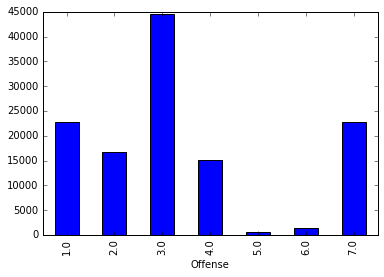

In [92]:
crime_data.groupby('Offense').size().plot(kind='bar')

# Choice 4: MultiOutputClassifier - Random Forest

In [93]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

In [94]:
Y.shape

(20000,)

In [95]:
y2 = shuffle(Y, random_state=1)
y2.shape

(20000,)

In [96]:
y3 = shuffle(y2, random_state=2)
y3.shape

(20000,)

In [97]:
Ya = np.vstack((Y, y2, y3)).T
Ya.shape

(20000, 3)

In [98]:
forest = RandomForestClassifier(n_estimators=100, random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)

In [99]:
multi_target_forest.fit(X, Ya)

MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False),
           n_jobs=-1)

# Lets Predict:

# On Thursday in Brooklyn, Sector "P" What possible can happen based on prediction?
Caution: Only if you are subject to any crime, prediction of crime is likely to happen.

In [109]:
multi_target_forest.predict(X[199])

C:\Users\rajag\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 7.,  3.,  3.]])

### Data dictionary: 
'BURGLARY' : 1,'FELONY ASSAULT':2,'GRAND LARCENY':3,'GRAND LARCENY OF MOTOR VEHICLE':4,
	'MURDER & NON-NEGL. MANSLAUGHTE':5,'RAPE':6,'ROBBERY':7


### Inference:
From the above prediction we can tell that a person can be subject Robbery or Grandlarceny of motor vehilce, but most likely can be subject to Grand larceny of motor vehiles.  

# Conclusion:
This prediction model can be questionable of practicality, but I believe this is a stepping stone for further analysis because many innovative analysis can be build on this. 
Finally, compared to diffrent models, if such a question (as mentioned above) arises, this would be one of few optimal ways to solve the problem.